In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")

cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL,
        date TEXT
    )
''')

data = [
    (1, 'Apple', 10, 2.5, '2024-06-01'),
    (2, 'Banana', 5, 1.5, '2024-06-02'),
    (3, 'Orange', 8, 3.0, '2024-06-03'),
    (4, 'Apple', 6, 2.5, '2024-06-04'),
    (5, 'Banana', 9, 1.5, '2024-06-05')
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?, ?, ?)", data)

conn.commit()
conn.close()

print("✅ Database created and sample data inserted.")

✅ Database created and sample data inserted.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

print("📊 Sales Summary:")
print(df)

📊 Sales Summary:
  product  total_qty  revenue
0   Apple         16     40.0
1  Banana         14     21.0
2  Orange          8     24.0


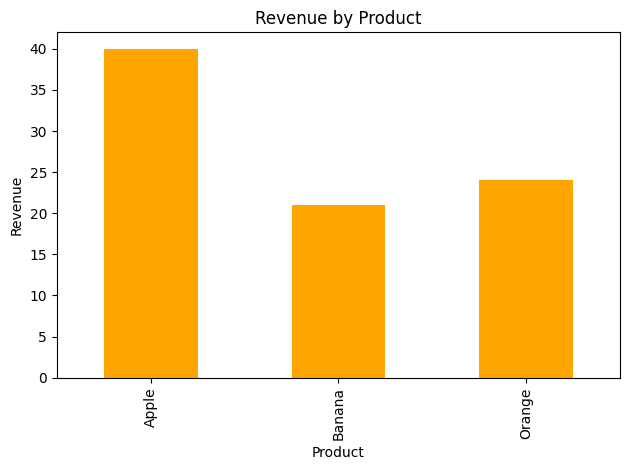

In [4]:
df.plot(kind='bar', x='product', y='revenue', color='orange', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

📁 Chart saved as 'sales_chart.png'


<Figure size 640x480 with 0 Axes>

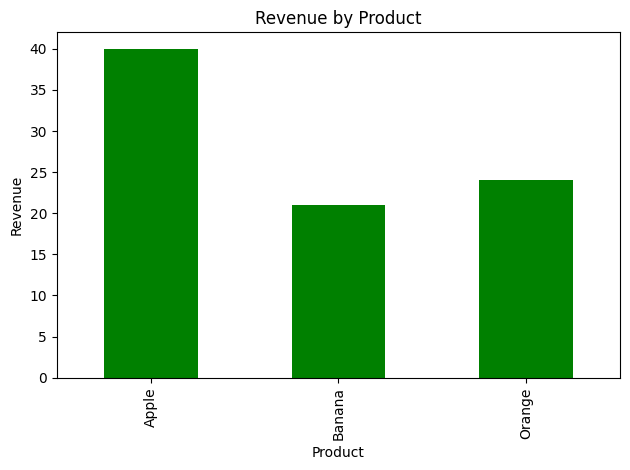

In [5]:
plt.figure()
df.plot(kind='bar', x='product', y='revenue', color='green', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
print("📁 Chart saved as 'sales_chart.png'")